MNIST Classification: GPU Version

The goal of this notebook is to implement a simple conv net to classify CIFAR10 images using Colab GPU and compare its training time against GPU on local workstation and <a href="https://colab.research.google.com/drive/1rP91Q5L1mPOVt7FcKkqFJSIMZrBtDawO">Colab TPU</a>.

In [ ]:
!pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==1.13.1


### initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = '/content/drive/My Drive/'

In [ ]:
import pandas as pd
#batch_df.to_csv(project_path+'batch_size_result.csv')
#unit_df.to_csv(project_path+'units_result.csv')
#layer_df.to_csv(project_path+'layer_result.csv')

batch_df=pd.read_csv(project_path+'batch_size_result.csv')
batch_df['CPU']=""
batch_df['CAcc']=""
batch_df['CLoss']=""
print(batch_df)

unit_df=pd.read_csv(project_path+'units_result.csv')
unit_df['CPU']=""
unit_df['CAcc']=""
unit_df['CLoss']=""
print(unit_df)

layer_df=pd.read_csv(project_path+'layer_result.csv')
layer_df['CPU']=""
layer_df['CAcc']=""
layer_df['CLoss']=""
layer_df

   Unnamed: 0  batch size    GPU  GAcc  GLoss CPU CAcc CLoss
0           0        1024  22.48  0.98   0.07               
1           1         512  42.03  0.98   0.07               
2           2         256  41.39  0.98   0.08               
   Unnamed: 0  Units    GPU   GAcc  GLoss CPU CAcc CLoss
0           0      8   3.96  0.962  0.465               
1           1     16  10.96  0.967  0.312               
2           2     32  10.65  0.974  0.145               
3           3     64  10.39  0.975  0.155               
4           4    128  20.88  0.977  0.106               
5           5    256  34.38  0.982  0.085               


,Unnamed: 0,Layers,GPU,GAcc,GLoss,CPU,CAcc,CLoss
0,0,2,22.48,0.981,0.065,,,
1,1,3,82.38,0.984,0.052,,,
2,2,4,125.59,0.987,0.041,,,


###Model

In [ ]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.9.2'

In [ ]:
# Check if eager execution mode is on
tf.executing_eagerly()

True

In [ ]:
from tensorflow.keras.datasets import mnist
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
split = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(X_train.shape, y_train.shape, X_val.shape, y_val.shape))

x_train: (48000, 28, 28), y_train: (48000,), x_val: (12000, 28, 28), y_val: (12000,)


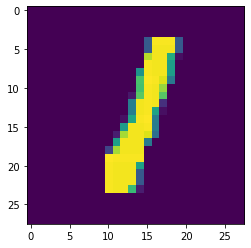

In [ ]:
#importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# Reshaping the data to fit the model
X_train = X_train.reshape(48000, 28, 28, 1)
X_val = X_val.reshape(12000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot= to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# batch size

## batch_size=1024

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 157s 3s/step - loss: 2.3182 - accuracy: 0.7463 - val_loss: 0.2419 - val_accuracy: 0.9268
Epoch 2/10
47/47 [==============================] - 141s 3s/step - loss: 0.1713 - accuracy: 0.9490 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 3/10
47/47 [==============================] - 144s 3s/step - loss: 0.0974 - accuracy: 0.9706 - val_loss: 0.0951 - val_accuracy: 0.9715
Epoch 4/10
47/47 [==============================] - 142s 3s/step - loss: 0.0716 - accuracy: 0.9779 - val_loss: 0.0858 - val_accuracy: 0.9743
Epoch 5/10
47/47 [==============================] - 143s 3s/step - loss: 0.0574 - accuracy: 0.9827 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 6/10
47/47 [==============================] - 143s 3s/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0743 - val_accuracy: 0.9776
Epoch 7/10
47/47 [==============================] - 143s 3s/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0730 - val_accuracy: 0.9796
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 1462.6255445480347 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)
batch_df['CPU'][batch_df['batch size']==1024]=round(end-start, 2)
batch_df['CAcc'][batch_df['batch size']==1024]=round(test_acc, 3)
batch_df['CLoss'][batch_df['batch size']==1024]=round(test_loss, 3)

layer_df['CPU'][layer_df['Layers']==2]=round(end-start, 2)
layer_df['CAcc'][layer_df['Layers']==2]=round(test_acc, 3)
layer_df['CLoss'][layer_df['Layers']==2]=round(test_loss, 3)

313/313 [==============================] - 10s 31ms/step - loss: 0.0754 - accuracy: 0.9792


<ipython-input-61-619f65edffef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CPU'][batch_df['batch size']==1024]=round(end-start, 2)
<ipython-input-61-619f65edffef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CAcc'][batch_df['batch size']==1024]=round(test_acc, 3)
<ipython-input-61-619f65edffef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CLoss'][batch_df['batch size']==1024]=round(test_loss,

## batch_size=512

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=512, epochs=10)

end = time()

Epoch 1/10
94/94 [==============================] - 146s 2s/step - loss: 1.5725 - accuracy: 0.8250 - val_loss: 0.1407 - val_accuracy: 0.9570
Epoch 2/10
94/94 [==============================] - 145s 2s/step - loss: 0.1057 - accuracy: 0.9668 - val_loss: 0.0927 - val_accuracy: 0.9703
Epoch 3/10
94/94 [==============================] - 145s 2s/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 4/10
94/94 [==============================] - 144s 2s/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0705 - val_accuracy: 0.9795
Epoch 5/10
94/94 [==============================] - 142s 2s/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0713 - val_accuracy: 0.9809
Epoch 6/10
94/94 [==============================] - 146s 2s/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0757 - val_accuracy: 0.9796
Epoch 7/10
94/94 [==============================] - 144s 2s/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 8/10
94

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 1462.4613091945648 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)
batch_df['CPU'][batch_df['batch size']==512]=round(end-start, 2)
batch_df['CAcc'][batch_df['batch size']==512]=round(test_acc, 3)
batch_df['CLoss'][batch_df['batch size']==512]=round(test_loss, 3)

313/313 [==============================] - 10s 30ms/step - loss: 0.0703 - accuracy: 0.9826


<ipython-input-65-6e7db744439e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CPU'][batch_df['batch size']==512]=round(end-start, 2)
<ipython-input-65-6e7db744439e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CAcc'][batch_df['batch size']==512]=round(test_acc, 3)
<ipython-input-65-6e7db744439e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CLoss'][batch_df['batch size']==512]=round(test_loss, 3)

## batch_size=256

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=256, epochs=10)

end = time()

Epoch 1/10
188/188 [==============================] - 146s 777ms/step - loss: 0.6765 - accuracy: 0.9059 - val_loss: 0.0947 - val_accuracy: 0.9711
Epoch 2/10
188/188 [==============================] - 149s 795ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0740 - val_accuracy: 0.9766
Epoch 3/10
188/188 [==============================] - 158s 839ms/step - loss: 0.0488 - accuracy: 0.9845 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 4/10
188/188 [==============================] - 148s 789ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0718 - val_accuracy: 0.9778
Epoch 5/10
188/188 [==============================] - 148s 785ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0627 - val_accuracy: 0.9818
Epoch 6/10
188/188 [==============================] - 147s 784ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 0.0713 - val_accuracy: 0.9801
Epoch 7/10
188/188 [==============================] - 145s 772ms/step - loss: 0.0205 - accuracy: 0.9928 - val_loss: 0.0734 -

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 1522.4479818344116 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

batch_df['CPU'][batch_df['batch size']==256]=round(end-start, 2)
batch_df['CAcc'][batch_df['batch size']==256]=round(test_acc, 3)
batch_df['CLoss'][batch_df['batch size']==256]=round(test_loss, 3)
batch_df

313/313 [==============================] - 8s 24ms/step - loss: 0.0754 - accuracy: 0.9811


<ipython-input-69-f9b24f5eebfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CPU'][batch_df['batch size']==256]=round(end-start, 2)
<ipython-input-69-f9b24f5eebfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CAcc'][batch_df['batch size']==256]=round(test_acc, 3)
<ipython-input-69-f9b24f5eebfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['CLoss'][batch_df['batch size']==256]=round(test_loss, 3)

,Unnamed: 0,batch size,GPU,GAcc,GLoss,CPU,CAcc,CLoss
0,0,1024,22.48,0.98,0.07,1462.63,0.979,0.075
1,1,512,42.03,0.98,0.07,1462.46,0.983,0.07
2,2,256,41.39,0.98,0.08,1522.45,0.981,0.075


# Units for batch size =1024



## Unit=8

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(8, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 10s 214ms/step - loss: 15.0654 - accuracy: 0.6036 - val_loss: 3.2018 - val_accuracy: 0.8393
Epoch 2/10
47/47 [==============================] - 10s 215ms/step - loss: 2.5056 - accuracy: 0.8657 - val_loss: 1.8880 - val_accuracy: 0.8863
Epoch 3/10
47/47 [==============================] - 10s 211ms/step - loss: 1.5660 - accuracy: 0.8977 - val_loss: 1.2884 - val_accuracy: 0.9108
Epoch 4/10
47/47 [==============================] - 10s 210ms/step - loss: 1.0623 - accuracy: 0.9209 - val_loss: 0.9848 - val_accuracy: 0.9244
Epoch 5/10
47/47 [==============================] - 10s 213ms/step - loss: 0.7916 - accuracy: 0.9344 - val_loss: 0.8378 - val_accuracy: 0.9309
Epoch 6/10
47/47 [==============================] - 10s 210ms/step - loss: 0.6221 - accuracy: 0.9434 - val_loss: 0.7393 - val_accuracy: 0.9376
Epoch 7/10
47/47 [==============================] - 10s 210ms/step - loss: 0.5069 - accuracy: 0.9507 - val_loss: 0.6378 - val_accuracy: 0.943

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 142.40220665931702 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==8]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==8]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==8]=round(test_loss, 3)

313/313 [==============================] - 2s 7ms/step - loss: 0.4622 - accuracy: 0.9519


<ipython-input-73-b384006591e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==8]=round(end-start, 2)
<ipython-input-73-b384006591e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==8]=round(test_acc, 3)
<ipython-input-73-b384006591e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==8]=round(test_loss, 3)


## Unit=16

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(16, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 13s 269ms/step - loss: 9.3146 - accuracy: 0.7254 - val_loss: 2.3035 - val_accuracy: 0.8929
Epoch 2/10
47/47 [==============================] - 13s 269ms/step - loss: 1.7240 - accuracy: 0.9031 - val_loss: 1.3449 - val_accuracy: 0.9169
Epoch 3/10
47/47 [==============================] - 12s 266ms/step - loss: 1.0489 - accuracy: 0.9223 - val_loss: 0.9822 - val_accuracy: 0.9273
Epoch 4/10
47/47 [==============================] - 12s 266ms/step - loss: 0.7410 - accuracy: 0.9329 - val_loss: 0.7649 - val_accuracy: 0.9371
Epoch 5/10
47/47 [==============================] - 12s 265ms/step - loss: 0.5435 - accuracy: 0.9452 - val_loss: 0.6579 - val_accuracy: 0.9404
Epoch 6/10
47/47 [==============================] - 12s 263ms/step - loss: 0.4291 - accuracy: 0.9521 - val_loss: 0.5443 - val_accuracy: 0.9460
Epoch 7/10
47/47 [==============================] - 13s 270ms/step - loss: 0.3502 - accuracy: 0.9574 - val_loss: 0.4921 - val_accuracy: 0.9489

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 127.70832872390747 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==16]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==16]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==16]=round(test_loss, 3)

313/313 [==============================] - 2s 7ms/step - loss: 0.3533 - accuracy: 0.9613


<ipython-input-77-d443bd7aaab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==16]=round(end-start, 2)
<ipython-input-77-d443bd7aaab8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==16]=round(test_acc, 3)
<ipython-input-77-d443bd7aaab8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==16]=round(test_loss, 3)


## Unit=32

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 18s 377ms/step - loss: 5.4618 - accuracy: 0.7843 - val_loss: 1.1151 - val_accuracy: 0.9184
Epoch 2/10
47/47 [==============================] - 17s 369ms/step - loss: 0.6709 - accuracy: 0.9389 - val_loss: 0.4919 - val_accuracy: 0.9479
Epoch 3/10
47/47 [==============================] - 18s 374ms/step - loss: 0.3095 - accuracy: 0.9604 - val_loss: 0.3195 - val_accuracy: 0.9581
Epoch 4/10
47/47 [==============================] - 18s 373ms/step - loss: 0.1981 - accuracy: 0.9701 - val_loss: 0.2715 - val_accuracy: 0.9620
Epoch 5/10
47/47 [==============================] - 17s 373ms/step - loss: 0.1397 - accuracy: 0.9761 - val_loss: 0.2496 - val_accuracy: 0.9629
Epoch 6/10
47/47 [==============================] - 18s 377ms/step - loss: 0.1050 - accuracy: 0.9793 - val_loss: 0.2279 - val_accuracy: 0.9668
Epoch 7/10
47/47 [==============================] - 17s 371ms/step - loss: 0.0820 - accuracy: 0.9821 - val_loss: 0.2101 - val_accuracy: 0.9673

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 177.92473459243774 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==32]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==32]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==32]=round(test_loss, 3)

313/313 [==============================] - 2s 8ms/step - loss: 0.1980 - accuracy: 0.9717


<ipython-input-81-ff427a4721e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==32]=round(end-start, 2)
<ipython-input-81-ff427a4721e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==32]=round(test_acc, 3)
<ipython-input-81-ff427a4721e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==32]=round(test_loss, 3)


## Unit=64

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 29s 613ms/step - loss: 7.5230 - accuracy: 0.7626 - val_loss: 1.1082 - val_accuracy: 0.9237
Epoch 2/10
47/47 [==============================] - 28s 604ms/step - loss: 0.6388 - accuracy: 0.9419 - val_loss: 0.4017 - val_accuracy: 0.9557
Epoch 3/10
47/47 [==============================] - 29s 609ms/step - loss: 0.2575 - accuracy: 0.9661 - val_loss: 0.2502 - val_accuracy: 0.9653
Epoch 4/10
47/47 [==============================] - 28s 603ms/step - loss: 0.1514 - accuracy: 0.9748 - val_loss: 0.2002 - val_accuracy: 0.9684
Epoch 5/10
47/47 [==============================] - 28s 606ms/step - loss: 0.0980 - accuracy: 0.9801 - val_loss: 0.1769 - val_accuracy: 0.9711
Epoch 6/10
47/47 [==============================] - 29s 611ms/step - loss: 0.0677 - accuracy: 0.9846 - val_loss: 0.1663 - val_accuracy: 0.9724
Epoch 7/10
47/47 [==============================] - 30s 646ms/step - loss: 0.0489 - accuracy: 0.9880 - val_loss: 0.1579 - val_accuracy: 0.9738

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 287.22005438804626 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==64]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==64]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==64]=round(test_loss, 3)

313/313 [==============================] - 3s 9ms/step - loss: 0.1338 - accuracy: 0.9747


<ipython-input-85-21b87699a9c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==64]=round(end-start, 2)
<ipython-input-85-21b87699a9c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==64]=round(test_acc, 3)
<ipython-input-85-21b87699a9c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==64]=round(test_loss, 3)


## Unit=128

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 51s 1s/step - loss: 9.1703 - accuracy: 0.7593 - val_loss: 1.0337 - val_accuracy: 0.9191
Epoch 2/10
47/47 [==============================] - 52s 1s/step - loss: 0.5585 - accuracy: 0.9435 - val_loss: 0.3241 - val_accuracy: 0.9584
Epoch 3/10
47/47 [==============================] - 51s 1s/step - loss: 0.1845 - accuracy: 0.9695 - val_loss: 0.1727 - val_accuracy: 0.9706
Epoch 4/10
47/47 [==============================] - 50s 1s/step - loss: 0.0896 - accuracy: 0.9805 - val_loss: 0.1416 - val_accuracy: 0.9727
Epoch 5/10
47/47 [==============================] - 51s 1s/step - loss: 0.0561 - accuracy: 0.9858 - val_loss: 0.1183 - val_accuracy: 0.9741
Epoch 6/10
47/47 [==============================] - 50s 1s/step - loss: 0.0362 - accuracy: 0.9899 - val_loss: 0.1063 - val_accuracy: 0.9768
Epoch 7/10
47/47 [==============================] - 50s 1s/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.1092 - val_accuracy: 0.9751
Epoch 8/10
47/47 [==

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 505.2812042236328 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==128]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==128]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==128]=round(test_loss, 3)

313/313 [==============================] - 4s 12ms/step - loss: 0.1015 - accuracy: 0.9792


<ipython-input-89-0eaa9ab72f54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==128]=round(end-start, 2)
<ipython-input-89-0eaa9ab72f54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==128]=round(test_acc, 3)
<ipython-input-89-0eaa9ab72f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==128]=round(test_loss, 3)


## Unit=256

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 96s 2s/step - loss: 17.9119 - accuracy: 0.7087 - val_loss: 0.8952 - val_accuracy: 0.9153
Epoch 2/10
47/47 [==============================] - 99s 2s/step - loss: 0.4332 - accuracy: 0.9449 - val_loss: 0.2041 - val_accuracy: 0.9630
Epoch 3/10
47/47 [==============================] - 94s 2s/step - loss: 0.1197 - accuracy: 0.9732 - val_loss: 0.1309 - val_accuracy: 0.9728
Epoch 4/10
47/47 [==============================] - 97s 2s/step - loss: 0.0605 - accuracy: 0.9844 - val_loss: 0.1070 - val_accuracy: 0.9753
Epoch 5/10
47/47 [==============================] - 94s 2s/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.1012 - val_accuracy: 0.9754
Epoch 6/10
47/47 [==============================] - 95s 2s/step - loss: 0.0229 - accuracy: 0.9934 - val_loss: 0.0942 - val_accuracy: 0.9782
Epoch 7/10
47/47 [==============================] - 94s 2s/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0888 - val_accuracy: 0.9790
Epoch 8/10
47/47 [=

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 953.3575134277344 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['CPU'][unit_df['Units']==256]=round(end-start, 2)
unit_df['CAcc'][unit_df['Units']==256]=round(test_acc, 3)
unit_df['CLoss'][unit_df['Units']==256]=round(test_loss, 3)

313/313 [==============================] - 6s 19ms/step - loss: 0.0994 - accuracy: 0.9807


<ipython-input-93-2fcc9ad2804f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CPU'][unit_df['Units']==256]=round(end-start, 2)
<ipython-input-93-2fcc9ad2804f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CAcc'][unit_df['Units']==256]=round(test_acc, 3)
<ipython-input-93-2fcc9ad2804f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['CLoss'][unit_df['Units']==256]=round(test_loss, 3)


# Layers

## conv layer = 3

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 496s 11s/step - loss: 1.3263 - accuracy: 0.7665 - val_loss: 0.1830 - val_accuracy: 0.9448
Epoch 2/10
47/47 [==============================] - 486s 10s/step - loss: 0.1307 - accuracy: 0.9598 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 3/10
47/47 [==============================] - 485s 10s/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.0800 - val_accuracy: 0.9768
Epoch 4/10
47/47 [==============================] - 481s 10s/step - loss: 0.0627 - accuracy: 0.9816 - val_loss: 0.0681 - val_accuracy: 0.9797
Epoch 5/10
47/47 [==============================] - 486s 10s/step - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 6/10
47/47 [==============================] - 485s 10s/step - loss: 0.0437 - accuracy: 0.9870 - val_loss: 0.0622 - val_accuracy: 0.9814
Epoch 7/10
47/47 [==============================] - 481s 10s/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 0.0608 - val_accuracy: 0.9825
Epoch 

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 4882.520084857941 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

layer_df['CPU'][layer_df['Layers']==3]=round(end-start, 2)
layer_df['CAcc'][layer_df['Layers']==3]=round(test_acc, 3)
layer_df['CLoss'][layer_df['Layers']==3]=round(test_loss, 3)

313/313 [==============================] - 29s 94ms/step - loss: 0.0568 - accuracy: 0.9838


<ipython-input-97-d7520bc499f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['CPU'][layer_df['Layers']==3]=round(end-start, 2)
<ipython-input-97-d7520bc499f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['CAcc'][layer_df['Layers']==3]=round(test_acc, 3)
<ipython-input-97-d7520bc499f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['CLoss'][layer_df['Layers']==3]=round(test_loss, 3)


## conv layer = 4

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 1431s 30s/step - loss: 1.3751 - accuracy: 0.7012 - val_loss: 0.1832 - val_accuracy: 0.9428
Epoch 2/10
47/47 [==============================] - 1418s 30s/step - loss: 0.1270 - accuracy: 0.9603 - val_loss: 0.0946 - val_accuracy: 0.9697
Epoch 3/10
47/47 [==============================] - 1433s 31s/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0727 - val_accuracy: 0.9771
Epoch 4/10
47/47 [==============================] - 1464s 31s/step - loss: 0.0641 - accuracy: 0.9806 - val_loss: 0.0633 - val_accuracy: 0.9796
Epoch 5/10
47/47 [==============================] - 1452s 31s/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 6/10
47/47 [==============================] - 1409s 30s/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 7/10
47/47 [==============================] - 1401s 30s/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0530 - val_accuracy: 0.9828

In [ ]:
print('Total training time {} seconds'.format(end - start))
#layer_df['CPU'][layer_df['Layers']==4]=round(end-start, 2)

Total training time 14245.290381669998 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)


#layer_df['CAcc'][layer_df['Layers']==4]=round(test_acc, 3)
#layer_df['CLoss'][layer_df['Layers']==4]=round(test_loss, 3)

313/313 [==============================] - 83s 264ms/step - loss: 0.0404 - accuracy: 0.9876


# Result

In [ ]:
batch_df.to_csv(project_path+'batch_size_result.csv')
unit_df.to_csv(project_path+'units_result.csv')
layer_df.to_csv(project_path+'layer_result.csv')